총평:  
  
굉장히 좋은 접근법이다.  
비전기냉방 과 태양광의 유무에 따라서 전력샤용량과의 상관관계를 보였다.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
train = pd.read_csv('./energy/train.csv', encoding='cp949')
test = pd.read_csv('./energy/test.csv', encoding='cp949')
submission = pd.read_csv('./energy/sample_submission.csv', encoding='cp949')

In [6]:
profile = train[['num', 'date_time', '전력사용량(kWh)', '비전기냉방설비운영', '태양광보유']]
profile

,num,date_time,전력사용량(kWh),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,0.0,0.0
1,1,2020-06-01 01,8135.640,0.0,0.0
2,1,2020-06-01 02,8107.128,0.0,0.0
3,1,2020-06-01 03,8048.808,0.0,0.0
4,1,2020-06-01 04,8043.624,0.0,0.0
...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,1.0,1.0
122396,60,2020-08-24 20,3975.696,1.0,1.0
122397,60,2020-08-24 21,3572.208,1.0,1.0
122398,60,2020-08-24 22,3299.184,1.0,1.0


In [9]:
profile['date_time'] = pd.to_datetime(profile['date_time'])
profile

,num,date_time,전력사용량(kWh),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,0.0,0.0
...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,1.0,1.0


In [10]:
profile['weekday'] = profile['date_time'].dt.weekday
profile['hour'] = profile['date_time'].dt.hour
profile = profile[profile['weekday'] <= 4] #주말 제외
profile

,num,date_time,전력사용량(kWh),비전기냉방설비운영,태양광보유,weekday,hour
0,1,2020-06-01 00:00:00,8179.056,0.0,0.0,0,0
1,1,2020-06-01 01:00:00,8135.640,0.0,0.0,0,1
2,1,2020-06-01 02:00:00,8107.128,0.0,0.0,0,2
3,1,2020-06-01 03:00:00,8048.808,0.0,0.0,0,3
4,1,2020-06-01 04:00:00,8043.624,0.0,0.0,0,4
...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,1.0,1.0,0,19
122396,60,2020-08-24 20:00:00,3975.696,1.0,1.0,0,20
122397,60,2020-08-24 21:00:00,3572.208,1.0,1.0,0,21
122398,60,2020-08-24 22:00:00,3299.184,1.0,1.0,0,22


한국에너지공단 통계(건물부문 용도구분) :   
백화점, 병원, 상용, 아파트, 연구소, 학교, 호텔, IDC(전화국) 등으로 추정   
  
출처 : 통계청 통계포털(KOSIS) -  
https://kosis.kr/statHtml/statHtml.do?orgId=115&tblId=DT_11507N_095&vw_cd=MT_ZTITLE&list_id=115_11507_K1&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [11]:
profile['num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

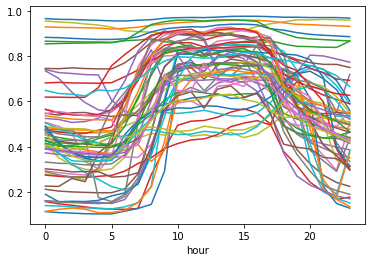

In [15]:
for idx in profile['num'].unique(): #idx를 이렇게 처리하시겠다
    site = profile[profile['num'] == idx] #이렇게 할 필요가 있었나?
    site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
    grp_site = site.groupby('hour')['전력사용량(kWh)'].mean()
    grp_site.plot()

전력사용량별로 최고값을 나눠서 %화 한 것 같은데...  
    
최고가를 시간별로 묶은애를.mean처리해서 플랏한 그림이다. 

In [17]:
group_1 = profile[(profile['비전기냉방설비운영'] == 0.0) & (profile['태양광보유'] == 0.0)]
group_2 = profile[(profile['비전기냉방설비운영'] == 0.0) & (profile['태양광보유'] == 1.0)]
group_3 = profile[(profile['비전기냉방설비운영'] == 1.0) & (profile['태양광보유'] == 0.0)]
group_4 = profile[(profile['비전기냉방설비운영'] == 1.0) & (profile['태양광보유'] == 1.0)]

비전기냉방설비 운영과 태양광이 어떤 영향을 미치는지 보고싶었던 것 같다.  

둘 다 없는경우

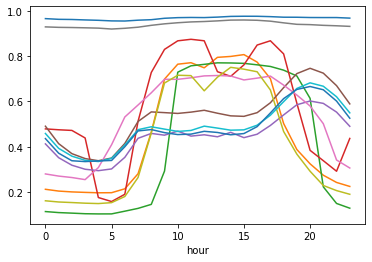

In [18]:
for idx in group_1['num'].unique():
    site = group_1[group_1['num'] == idx]
    site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
    grp_site = site.groupby('hour')['전력사용량(kWh)'].mean()
    grp_site.plot()

둘 다 있는 경우

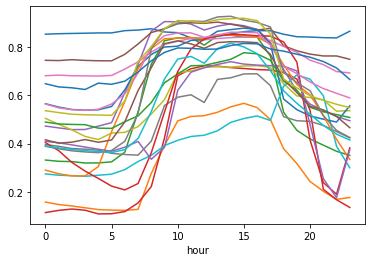

In [19]:
for idx in group_4['num'].unique():
    site = group_4[group_4['num'] == idx]
    site['전력사용량(kWh)'] = site['전력사용량(kWh)']/site['전력사용량(kWh)'].max()
    grp_site = site.groupby('hour')['전력사용량(kWh)'].mean()
    grp_site.plot()

In [20]:
group_1['num'].unique() #비전기냉방, 태양광 없음

array([ 1,  6, 11, 18, 19, 20, 29, 32, 48, 49, 50], dtype=int64)

In [22]:
group_4['num'].unique() #둘 다 있는경우

array([ 3,  4,  8, 12, 14, 16, 24, 27, 30, 34, 37, 38, 39, 40, 42, 43, 44,
       47, 52, 55, 60], dtype=int64)

In [27]:
print(group_2['num'].unique())
print(group_3['num'].unique())

[ 9 21 23 26 36 45 51 56]
[ 2  5  7 10 13 15 17 22 25 28 31 33 35 41 46 53 54 57 58 59]


상단은, 건물의 num이 냉방기랑 태양광의 유무로 그룹핑해서 어떤 건물번호가 어떤 상태인지를 쉽게 보고자 찍어본 코드다.

하단은,   

비전기 냉방 그러니까 ==> 전력을 먹지 않은 상태로 하는 냉방  

태양광  ==> 태양열로 뭔가를 한다?? 

태양열을 쓰니까, 낮에는 전력사용량이 줄어들지 않을까?? 하는 추측에서 시작

In [25]:
type_A = train[train['num'] == 32]#비전기냉방X, 태양광X 
type_A[['전력사용량(kWh)', '기온(°C)', '일조(hr)']].corr()

,전력사용량(kWh),기온(°C),일조(hr)
전력사용량(kWh),1.000000,0.783170,0.612541
기온(°C),0.783170,1.000000,0.527438
일조(hr),0.612541,0.527438,1.000000


이정도면 꽤 높은 상관관계 아닌가?

In [26]:
type_B = train[train['num'] == 3] #비전기냉방, 태양광 있는 사이트
type_B[['전력사용량(kWh)', '기온(°C)', '일조(hr)' ]].corr()

#낮에 태양광 발전 때문에 전력소비량이 줄어든 것으로 추정, 모든 사이트가 그렇지는 않음

,전력사용량(kWh),기온(°C),일조(hr)
전력사용량(kWh),1.000000,0.229588,-0.079640
기온(°C),0.229588,1.000000,0.527438
일조(hr),-0.079640,0.527438,1.000000


일단 여기서 끝났는데, 비전기냉방이 없고 태양광이 있는것도 함 봐야하는거 아닌가?

In [29]:
type_C = train[train['num'] == 21] #얘는 비전기 X 태양광 O
type_C[['전력사용량(kWh)', '기온(°C)', '일조(hr)' ]].corr()

,전력사용량(kWh),기온(°C),일조(hr)
전력사용량(kWh),1.000000,0.622568,0.171340
기온(°C),0.622568,1.000000,0.504956
일조(hr),0.171340,0.504956,1.000000


In [30]:
type_D = train[train['num'] == 5] #비전기 O 태양광 X
type_D[['전력사용량(kWh)', '기온(°C)', '일조(hr)' ]].corr()

,전력사용량(kWh),기온(°C),일조(hr)
전력사용량(kWh),1.000000,0.272932,0.013632
기온(°C),0.272932,1.000000,0.546492
일조(hr),0.013632,0.546492,1.000000


태양광이 있으면 기온에따라 건물 전력사용량과 어떠한 상관관계가 있다는것을 깨달을수가 있다.

그런데 늘어나는지 줄어드는지는 어떻게 아는걸까?